In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss, roc_curve, auc, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.feature_selection import mutual_info_classif

In [2]:
#load the dataset, column names are in the second row
df = pd.read_csv('churn_data.csv', header=1)

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.shape

(3333, 21)

In [5]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
#check the dtype of each column. There are no missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
#check for duplicates, which there are none
df.duplicated().sum()

0

In [8]:
#add column that combines the total domestic calls
total_dom_calls = df['total day calls'] + df['total eve calls'] + df['total night calls']
df.insert(7, 'total domestic calls', total_dom_calls)

In [9]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total domestic calls,total day minutes,total day calls,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,300,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,329,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,328,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,248,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,356,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
#add column that combines the total domestic minutes
total_dom_mins = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']
df.insert(8, 'total domestic minutes', total_dom_mins)

In [11]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total domestic calls,total domestic minutes,total day minutes,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,300,707.2,265.1,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,329,611.5,161.6,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,328,527.2,243.4,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,248,558.2,299.4,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,356,501.9,166.7,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
#check the value counts of churn column
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [13]:
#convert the churn counts into percentages 
churn_rate = df['churn'].value_counts() / len(df['churn']) * 100 
churn_rate

False    85.508551
True     14.491449
Name: churn, dtype: float64

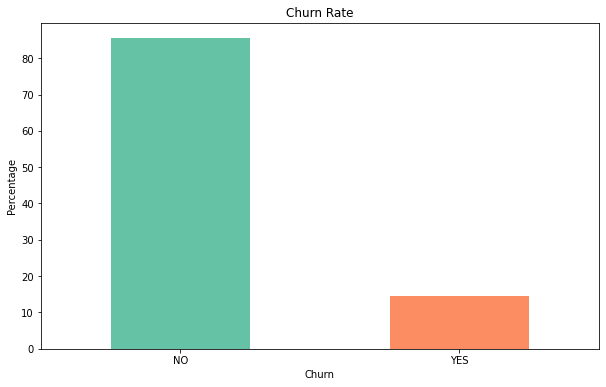

In [14]:
#plot the churn rate
fig, ax = plt.subplots(figsize=(10, 6)) 
colors = sns.color_palette('Set2')
churn_rate.plot(kind='bar', ax=ax, color=colors)
ax.set_xlabel('Churn')
ax.set_ylabel('Percentage')
ax.set_title('Churn Rate')
ax.set_xticklabels(['NO', 'YES'], rotation=0)
plt.show()

In [15]:
categoric = ['state', 'area code', 'voice mail plan', 'international plan']
numeric = []
for c in df.columns:
    if c not in categoric:
        numeric.append(c)

In [16]:
numeric.remove('phone number')

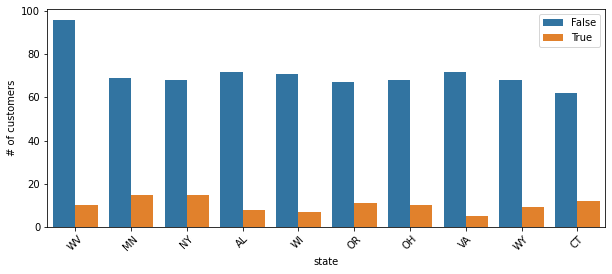

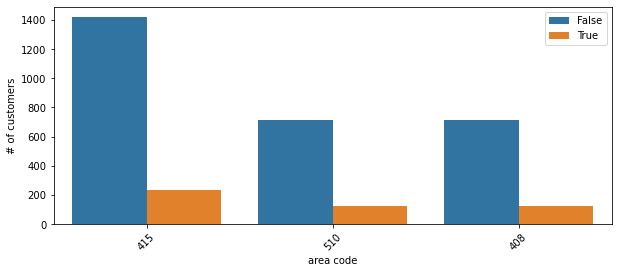

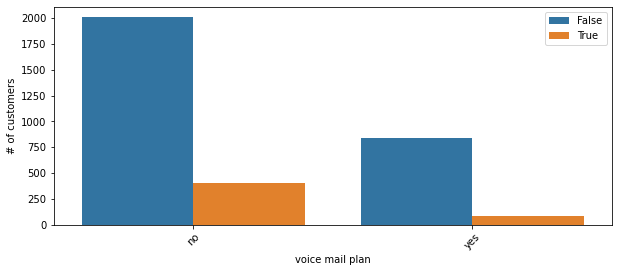

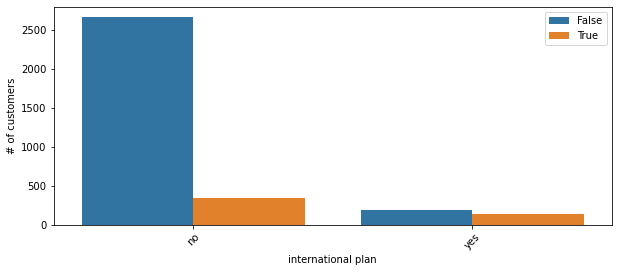

In [17]:
for cat in categoric:
    plt.figure(figsize=(10,4))
    sns.countplot(x=cat, hue="churn", data=df, order= df[cat].value_counts().iloc[0:10].index)
    plt.xticks(rotation=45)
    plt.ylabel('# of customers')
    plt.legend(loc="upper right")
    plt.show()

In [18]:
print(df['churn'].value_counts())

False    2850
True      483
Name: churn, dtype: int64


In [19]:
churn_per_state = df.groupby('state')['churn'].sum().sort_values(ascending=False)
churn_per_state.head()

state
TX    18
NJ    18
MD    17
MI    16
NY    15
Name: churn, dtype: int64

In [20]:
customers_per_state = df.groupby('state').sum()
customers_per_state.head()

,account length,area code,number vmail messages,total domestic calls,total domestic minutes,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,
AK,5054,22812,471,15038,28859.7,9276.0,4954,1576.94,9582.7,5022,814.54,10001.0,5062,450.05,521.0,250,140.68,81,3
AL,7842,34450,574,23694,45500.6,14880.8,7928,2529.72,15637.0,7877,1329.16,14982.8,7889,674.23,823.4,376,222.32,125,8
AR,5334,24159,396,16447,32044.0,9686.4,5618,1646.70,11057.6,5381,939.93,11300.0,5448,508.52,570.5,258,154.04,109,11
AZ,6430,27690,606,19360,35414.9,10982.7,6407,1867.08,12015.9,6554,1021.37,12416.3,6399,558.76,680.4,311,183.72,102,4
CA,3374,15011,306,10431,19755.5,6241.2,3553,1061.01,6765.0,3505,575.06,6749.3,3373,303.72,335.5,151,90.63,50,9


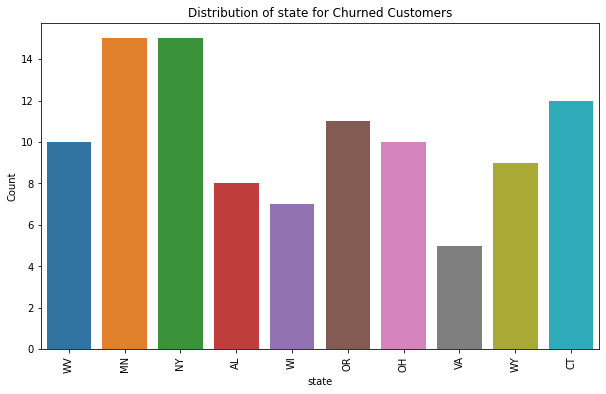

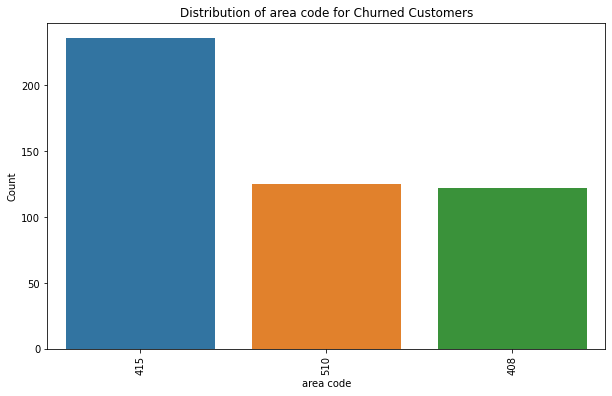

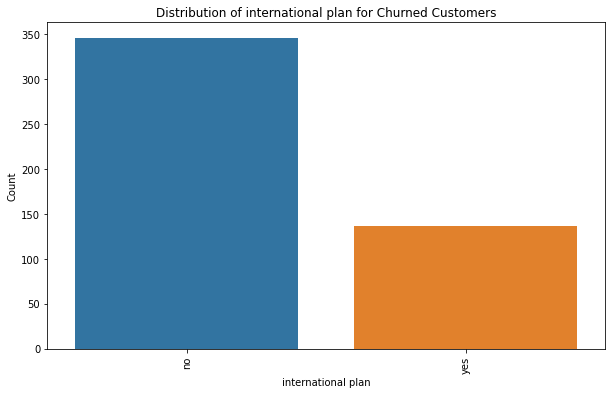

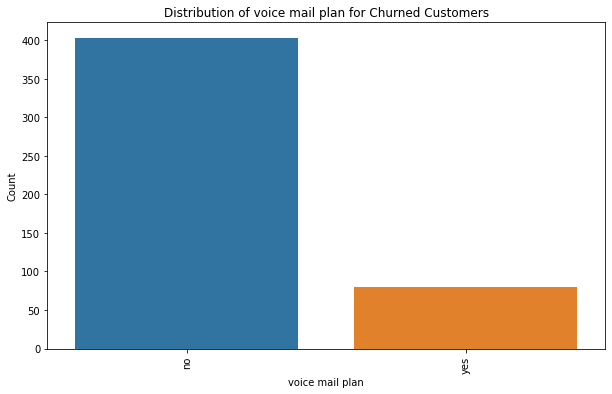

In [21]:
# Select the churned customers
churned_customers = df[df['churn'] == True]

# Iterate over the feature columns
for column in churned_customers.columns:
    if column in categoric:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, data=churned_customers, order=df[column].value_counts().iloc[0:10].index)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f"Distribution of {column} for Churned Customers")
        plt.xticks(rotation=90)
        plt.show()

In [22]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [23]:
plan_columns = ['international plan', 'voice mail plan']
for c in plan_columns:
    df.loc[df[c] == 'no', c] = 0
    df.loc[df[c] == 'yes', c] = 1

In [24]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total domestic calls,total domestic minutes,total day minutes,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,300,707.2,265.1,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,329,611.5,161.6,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,328,527.2,243.4,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,248,558.2,299.4,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,356,501.9,166.7,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


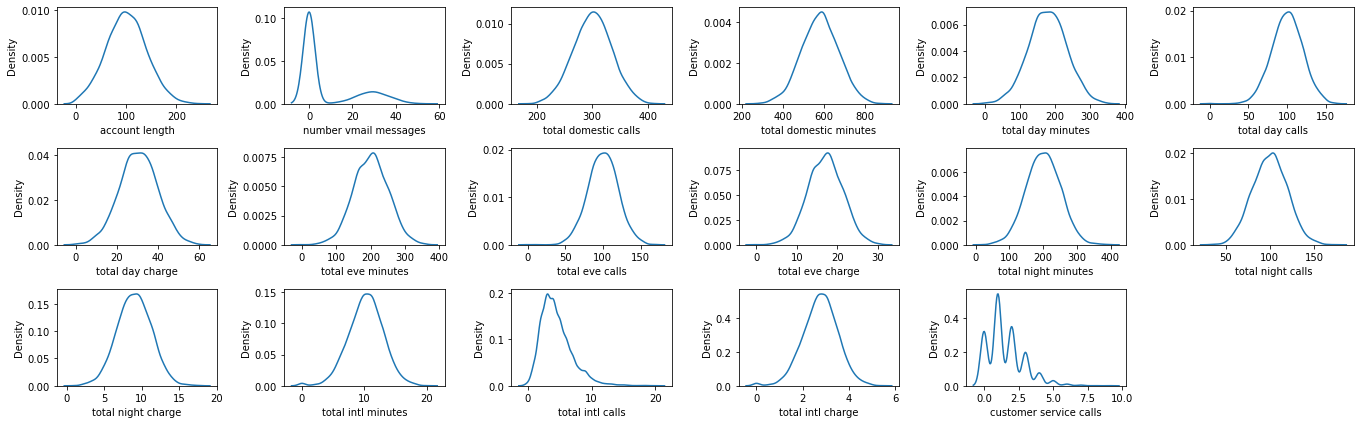

In [25]:
fig, ax = plt.subplots(len(numeric)//5,6,figsize=(19,6))
ax = ax.flatten()
for i, j in enumerate(numeric):
    if j != 'churn':
        sns.kdeplot(df[j],ax=ax[i]);
fig.delaxes(ax[-1])
plt.tight_layout()
plt.show()

In [26]:
print("The original dataframe has {} columns.".format(df.shape[1]))
# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

reduced_df = df.drop(to_drop, axis=1) # Drop the features
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The original dataframe has 23 columns.
The reduced dataframe has 19 columns.


In [27]:
reduced_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total domestic calls,total domestic minutes,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,300,707.2,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,329,611.5,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,328,527.2,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,248,558.2,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,356,501.9,113,28.34,122,12.61,121,8.41,3,2.73,3,False


In [28]:
# Assume 'df' is your DataFrame and 'columns_to_encode' is a list of categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Extract the categorical columns and convert them to a separate DataFrame
df_categorical = reduced_df[categoric]

# Fit and transform the categorical DataFrame using the encoder
encoded_categorical = encoder.fit_transform(df_categorical)

# Create a new DataFrame with the encoded categorical columns
df_encoded = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names(categoric))

# Drop the original categorical columns from the original DataFrame
df_final = reduced_df.drop(columns=categoric)

# Concatenate the encoded categorical columns with the original DataFrame
df_final = pd.concat([df_final, df_encoded], axis=1)

In [29]:
df_final.head()

,account length,phone number,number vmail messages,total domestic calls,total domestic minutes,total day calls,total day charge,total eve calls,total eve charge,total night calls,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,voice mail plan_0,voice mail plan_1,international plan_0,international plan_1
0,128,382-4657,25,300,707.2,110,45.07,99,16.78,91,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,107,371-7191,26,329,611.5,123,27.47,103,16.62,103,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,137,358-1921,0,328,527.2,114,41.38,110,10.30,104,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,84,375-9999,0,248,558.2,71,50.90,88,5.26,89,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,75,330-6626,0,356,501.9,113,28.34,122,12.61,121,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
